In [8]:
from pathlib import Path

images = list(Path("data/full").glob("*"))
reference = Path("data/full/0ac92ce752957f77d26dbad47de3690822144f88.jpg")

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def imread(path):
    return np.asarray(Image.open(str(path)).convert("L"))

(68, 43)

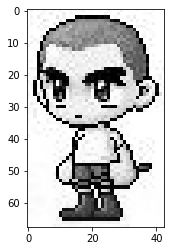

In [57]:
ref = imread(reference)
plt.imshow(ref, cmap="gray")
ref.shape

In [58]:
shapes = []
for image in images:
    shapes.append(imread(image).shape)

In [61]:
import pandas as pd

shapes_df = pd.DataFrame(shapes, columns=["x", "y"])
shapes_df.describe()

x           y
count  260.000000  260.000000
mean    76.046154   62.461538
std     13.515820   20.948790
min     68.000000   43.000000
25%     70.000000   49.000000
50%     72.000000   56.500000
75%     78.000000   69.250000
max    211.000000  198.000000

<AxesSubplot:>

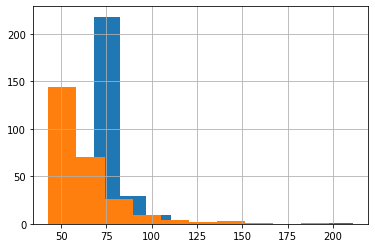

In [62]:
shapes_df.x.hist()
shapes_df.y.hist()

In [67]:
shapes_df.groupby(["x", "y"]).size()

x    y  
68   43     8
     44     3
     46     1
     47     8
     49     4
           ..
108  156    1
122  78     1
136  126    1
151  151    1
211  198    1
Length: 142, dtype: int64

(68, 43)

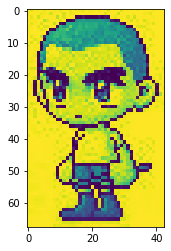

In [68]:
plt.imshow(ref)
ref.shape

(70, 49)


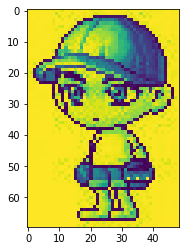

In [131]:
x = imread(images[52])
plt.imshow(x)
print(x.shape)

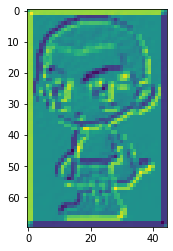

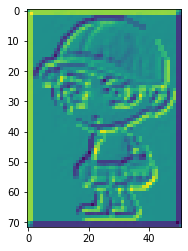

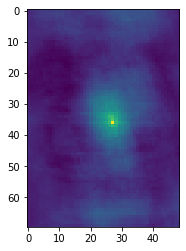

(36, 27)

In [132]:
from scipy.signal import fftconvolve

# https://stackoverflow.com/a/24769222

def sobel(img):
    kernel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    kernel_y = kernel_x.T
    x = fftconvolve(img, kernel_x) + fftconvolve(img, kernel_y)
    return x

def cross_image(im1, im2):
    im1_gray = im1.astype("float")
    im2_gray = im2.astype("float")
    im1_gray -= np.mean(im1_gray)
    im2_gray -= np.mean(im2_gray)
    return fftconvolve(im1_gray, im2_gray[::-1, ::-1], mode="same")

def brightest(img):
    return np.unravel_index(np.argmax(img), img.shape)

plt.imshow(sobel(ref))
plt.show()
plt.imshow(sobel(x))
plt.show()
corr = cross_image(x, ref)
coord = brightest(corr)
plt.imshow(corr)
plt.show()
coord

(37, 28)

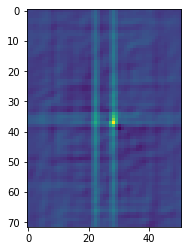

In [133]:
corr = cross_image(sobel(x), sobel(ref))
coord = brightest(corr)
plt.imshow(corr)
coord

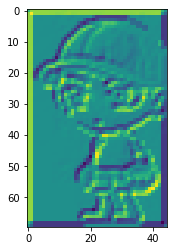

In [134]:
plt.imshow(sobel(x[:ref.shape[0], :ref.shape[1]]))

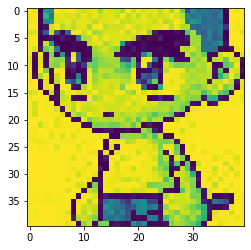

<ipython-input-135-ed902556dcf9>:7: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(x[c[0]-20:c[0]+20, c[1]-20:c[1]+20])


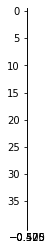

In [135]:
c_x = brightest(cross_image(x, x))
c_r = brightest(cross_image(ref, ref))
c = brightest(cross_image(sobel(ref), sobel(x)))

plt.imshow(ref[c_r[0]-20:c_r[0]+20, c_r[1]-20:c_r[1]+20])
plt.show()
plt.imshow(x[c[0]-20:c[0]+20, c[1]-20:c[1]+20])